# 1.2 Electron Transport in molec. dingenskirchens

In [41]:
import numpy as np
import matplotlib.pyplot as plt

### Unterpunkt b: Implementing Gauss Seidel & Testing
Also basically wird mit dem Gauss Seidel Algorythmus ein Gleichungssystem der Form Ax=b für x gelöst, wobei A die zufäll

(100, 100)
(100,)


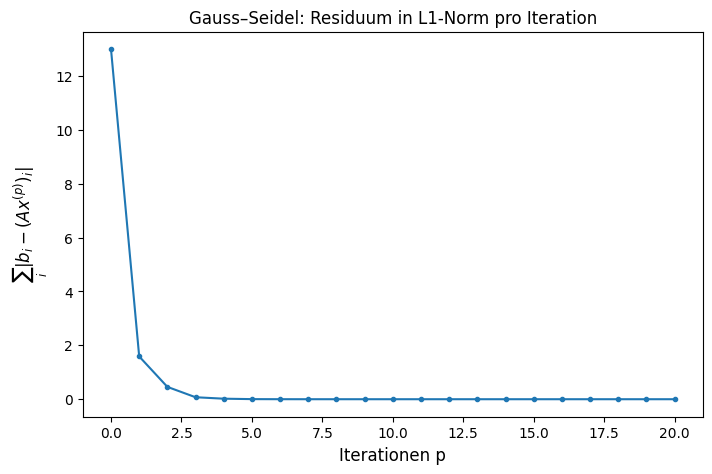

In [42]:
# Erstellen einer zufälligen 100x100 Matrix A und Vektor b, die dem Gauss Seidel Verfahren genügen
# strikte Diagonale Dominanz der Matrix, was die Konvergenz garantiert
n = 100
X = np.random.rand(n, n)
A= X@X.T 
np.fill_diagonal(A, np.sum(np.abs(A), axis=1) + 1)  # Diagonalelemente ersetezn durch Summe der Zeilen plus 1 (strikte Diagonale Dominanz)
b = np.random.rand(n)


print(np.shape(A))
print(np.shape(b)) 

# Definiere Gauss-Seidel-Verfahrens
def gauss_seidl(A, b, max_iters=1000, tol=1e-10): # max_iters: maximale Anzahl an Iterationen, tol: Toleranz für Abbruch (um Endlosschleifen zu vermeiden)
    n = b.size
    x = np.zeros_like(b, dtype=complex) # Anfangslösung x^(0) = 0 vektor

    errs = [] # Liste zur Speicherung der Fehlerwerte pro Iteration, anfangs leer
    for _ in range(max_iters): # Diese Schleife ersetzt immer en ganzen Vektor x^(p) durch x^(p+1)
        x_old = x.copy()
        for i in range(n): # Diese Schleife berechnet die i-te Komponente von x^(p+1) 
            s1 = A[i, :i] @ x[:i]          # Summe über neue Werte j<i (Berechnet mit Skalarprodukt weil SP eine Summe ist)
            s2 = A[i, i+1:] @ x_old[i+1:]  # Summe über alte Werte j>i
            x[i] = (b[i] - s1 - s2) / A[i, i] # Update der i-ten Komponente von x

        r = b - A @ x # Residuum r = b - A x^(p)
        err = np.sum(np.abs(r))     # geforderte Größe: Summe |b - A x^(p)| als Einzelwert
        errs.append(err) # Fehlerwert zur Liste der Fehlerwerte errs hinzufügen
        if err < tol: # wenn Fehler kleiner als Toleranz, Abbruch
            break
    return x, np.array(errs)

x, errs = gauss_seidl(A, b, max_iters=1000, tol=1e-12)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(errs, marker='o', linestyle='-', markersize=3)
#plt.yscale('log')  # Logarithmische Skalierung der y-Achse wie in Angabe empfohlen
plt.xlabel('Iterationen p', fontsize=12)
plt.ylabel(r'$\sum_i |b_i - (A x^{(p)})_i|$', fontsize=12)
plt.title('Gauss–Seidel: Residuum in L1-Norm pro Iteration')
plt.show()

Unterpunkt c: Ringfunktion

In [43]:
import numpy as np

def ring(N, t, E, delta, alpha, beta):
    
    HR = np.zeros((N, N), dtype=float)
    for i in range(N-1):
        HR[i, i+1] = t # Matrix einträge ij sind t für benachbarte i,j (1,2), (2,3), ... (6,1)
        HR[i+1, i] = t # auch (2,1), (3,2), ... (1,6) sind t
    HR[0, N-1] = t   # 1 ist mit N verbunden
    HR[N-1, 0] = t

    # Delta matrix ist delta an alpha, beta positionen, sonst 0
    Delta = np.zeros((N, N), dtype=float)
    Delta[alpha-1, alpha-1] = delta #-1 weil python 0-indexiert und physikalisch 1-indexiert
    Delta[beta-1,  beta-1]  = delta

    # A(E) = HR - E I + i Delta
    A = HR - E*np.eye(N) + 1j*Delta # np.eye(N) ist Einheitsmatrix NxN
    return A

A1 = ring(N=6, t=-2.6, E=3, delta=0.5, alpha=1, beta=3)
A2 = ring(N=6, t=-2.6, E=3, delta=0.5, alpha=1, beta=4)

print(A1)
print(A2)

# Hilfsfunktion um nur den Ring-Hamiltonian zu erzeugen
def Hr(N, t):
    
    HR = np.zeros((N, N), dtype=float)
    for i in range(N-1):
        HR[i, i+1] = t # Matrix einträge ij sind t für benachbarte i,j (1,2), (2,3), ... (6,1)
        HR[i+1, i] = t # auch (2,1), (3,2), ... (1,6) sind t
    HR[0, N-1] = t   # 1 ist mit N verbunden
    HR[N-1, 0] = t
    return HR

HR = Hr(N=6, t=-2.6)
print(HR) 

[[-3. +0.5j -2.6+0.j   0. +0.j   0. +0.j   0. +0.j  -2.6+0.j ]
 [-2.6+0.j  -3. +0.j  -2.6+0.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j  -2.6+0.j  -3. +0.5j -2.6+0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j  -2.6+0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j  -2.6+0.j ]
 [-2.6+0.j   0. +0.j   0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j ]]
[[-3. +0.5j -2.6+0.j   0. +0.j   0. +0.j   0. +0.j  -2.6+0.j ]
 [-2.6+0.j  -3. +0.j  -2.6+0.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j  -2.6+0.j  -3. +0.j  -2.6+0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j  -2.6+0.j  -3. +0.5j -2.6+0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j  -2.6+0.j ]
 [-2.6+0.j   0. +0.j   0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j ]]
[[ 0.  -2.6  0.   0.   0.  -2.6]
 [-2.6  0.  -2.6  0.   0.   0. ]
 [ 0.  -2.6  0.  -2.6  0.   0. ]
 [ 0.   0.  -2.6  0.  -2.6  0. ]
 [ 0.   0.   0.  -2.6  0.  -2.6]
 [-2.6  0.   0.   0.  -2.6  0. ]]


### Unterpunkt d: k Shift für Diagonale Dominanz und Konvergenz von Gauss Beidl

In [44]:
N, t, E, delta, alpha, beta = 6, -2.6, 3.0, 0.5, 1, 3
A0 = ring(N, t, E, delta, alpha, beta)
I = np.eye(N, dtype=np.complex128)

k = 6*1j 
Ak = A0 + k * np.eye(N, dtype=np.complex128)

G = np.zeros((N, N), dtype=np.complex128)
for _ in range(500):  # outer fixed-point
    RHS= I + k * G
    G_new = np.zeros_like(G)
    for j in range(N):
        G_new[:, j] = gauss_seidl(Ak, RHS[:, j], max_iters=1000, tol=1e-12)[0]
    G = G_new
print("Green's function G:", G) #OLTA ENDLICH



Green's function G: [[-0.62548031-0.33703573j  0.28279606+0.04758552j  0.29917157+0.2821508j
  -0.68225064-0.31562178j  0.48804487+0.08201789j  0.11911432+0.22100655j]
 [ 0.28279606+0.04758552j -0.82350467-0.08251897j  0.28279606+0.04758552j
   0.48804487+0.08201789j -0.84593238-0.14220075j  0.48804487+0.08201789j]
 [ 0.29917157+0.2821508j   0.28279606+0.04758552j -0.62548031-0.33703573j
   0.11911432+0.22100655j  0.48804487+0.08201789j -0.68225064-0.31562178j]
 [-0.68225064-0.31562178j  0.48804487+0.08201789j  0.11911432+0.22100655j
  -0.66798157-0.31412913j  0.26702339+0.1414403j   0.35986806+0.15094875j]
 [ 0.48804487+0.08201789j -0.84593238-0.14220075j  0.48804487+0.08201789j
   0.26702339+0.1414403j  -0.79615837-0.24519827j  0.26702339+0.1414403j ]
 [ 0.11911432+0.22100655j  0.48804487+0.08201789j -0.68225064-0.31562178j
   0.35986806+0.15094875j  0.26702339+0.1414403j  -0.66798157-0.31412913j]]
